In [ ]:
!pip install mrsimulator

In [1]:
import matplotlib.pyplot as plt

import mrsimulator.signal_processing as sp
import mrsimulator.signal_processing.apodization as apo

from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator.methods import MQVAS

In [2]:
def update(method):
    """
        1) Create a single-site spin system,
        2) update the method of the simulator object,
        3) re-run the simulation,
        4) add post simulation processing, and
        5) plot the data
    """

    site = Site(
        isotope="87Rb",
        isotropic_chemical_shift=-7,  # in ppm
        shielding_symmetric={
            "zeta": 110,  # in ppm
            "eta": 0
        },
        quadrupolar={
            "Cq": 3.5e6,  # in Hz
            "eta": 0.3,
            "alpha": 0,  # in rads
            "beta": 70 * 3.1415 / 180,  # in rads
            "gamma": 0,  # in rads
        },
    )
    sys = [SpinSystem(sites=[site])]
    
    # simulator object
    sim = Simulator()
    sim.spin_systems = sys
    sim.methods = [method]
    
    sim.config.integration_volume='hemisphere'
    sim.run()

    data = sim.methods[0].simulation
    
    # plot the simulation
    ax = plt.gca(projection='csdm')
    ax.imshow(data, aspect='auto', cmap='gist_ncar_r')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.show()

# 3QMAS

In [7]:
method1 = MQVAS(
    channels=["87Rb"],
    magnetic_flux_density=9.4,  # in T
    rotor_angle = 54.735 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": 4e3,  # in Hz
            "label": "3Q dimension",
            "events": [{
                "transition_query": {'P': [-3], 'D': [0]}
            }]
        },
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -4e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

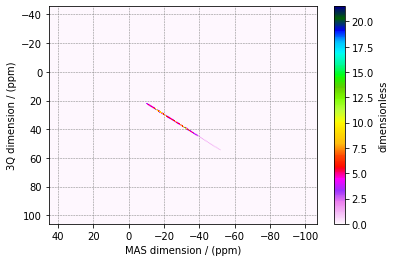

In [8]:
update(method1)

# STMAS

In [9]:
method2 = MQVAS(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    rotor_angle = 54.735 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 6e4,  # in Hz
            "reference_offset": -1e3,  # in Hz
            "label": "Satelline transition dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [-2, 2]}
            }]
        },
        {
            "count": 256,
            "spectral_width": 5e4,  # in Hz
            "reference_offset": -7e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

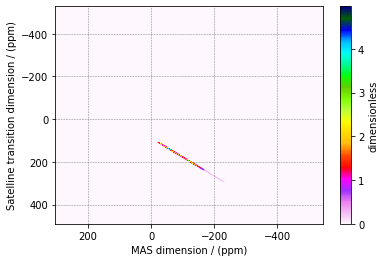

In [10]:
update(method2)

# STVAS

In [11]:
method3 = MQVAS(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    rotor_angle = 50 * 3.1415 / 180, # in rads  <--------
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 6e5,  # in Hz
            "reference_offset": 1e4,  # in Hz
            "label": "Satelline transition dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [2, -2, 0]}
            }]
        },
        {
            "count": 256,
            "spectral_width": 3e4,  # in Hz
            "reference_offset": -9e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

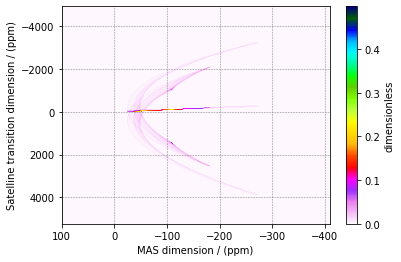

In [12]:
update(method3)

# COASTER

In [13]:
method4 = MQVAS(
    channels=["87Rb"],
    magnetic_flux_density=9.4,  # in T
    rotor_angle = 70.12 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 4e4,  # in Hz
            "reference_offset": -8e3,  # in Hz
            "label": "3Q dimension",
            "events": [{
                "transition_query": {'P': [3], 'D': [0]}
            }]
        },
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -3e3,  # in Hz
            "label": "70.12 dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

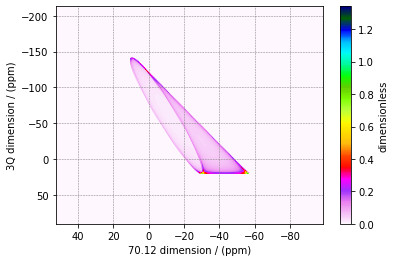

In [14]:
update(method4)

# SAS

In [37]:
method5 = MQVAS(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -5e3,  # in Hz
            "label": "70.12 dimension",
            "events": [{
                "rotor_angle": 70.12 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
        {
            "count": 256,
            "spectral_width": 3e4,  # in Hz
            "reference_offset": -7e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "rotor_angle": 54.735 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

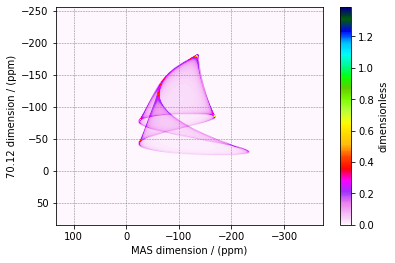

In [38]:
update(method5)